In [1]:
from astropy.io import fits
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import subprocess
from sklearn.cluster import DBSCAN
from analyzeImage import analyzeImage


In [2]:
gpu_code_path = "../code/gpu/"
real_image_name = "chip_7"
real_image_path = gpu_code_path+"images/"+real_image_name
psi_image_path = gpu_code_path+"output-images/psi"
phi_image_path = gpu_code_path+"output-images/phi"

In [94]:
paramsFile = open('../code/gpu/debug/parameters.config', 'w')
paramsFile.write(
"""Debug ................ : 1
Image Count .......... : 60
Generate Images ...... : 1
Image Width .......... : 500
Image Height ......... : 500
PSF Sigma ............ : 1.0
Object Brightness .... : 120.0
Object Initial x ..... : 250.0
Object Initial y ..... : 240.0
Velocity x ........... : 0.5
Velocity y ........... : -0.2
Background Level ..... : 1024.0
Background Sigma ..... : 32.0
Mask Threshold ....... : 40.0
Mask Penalty ......... : -0.012
Angles to Search ..... : 80
Velocities to Search . : 30
Minimum Velocity ..... : 0.0
Maximum Velocity ..... : 2.0
Write to file ........ : 1
Source Images Path ... : ../../{source}/
Psi Images Path ...... : ../../{psi}/
Phi Images Path....... : ../../{phi}/
""".format( source=real_image_path, psi=psi_image_path, phi=phi_image_path ))
paramsFile.close()

In [21]:
os.system("../code/gpu/debug/clearImages.sh")

os.system("../code/gpu/debug/CudaTracker")

34304

In [64]:
results = np.genfromtxt('../code/gpu/debug/results/results.txt', names=True)

In [29]:
print(results)

[(50.0, 60.0, 0.0, 0.0, -0.0, -100.0, 8.017, 1564.789)
 (50.0, 59.0, 0.0, 0.0, -0.0, -100.0, 6.623, 1292.678)
 (51.0, 60.0, 0.0, 0.0, -0.0, -100.0, 6.551, 1278.789) ...,
 (49.0, 47.0, 0.0, 0.0, -30.0, -51.962, 0.736, 143.629)
 (53.0, 67.0, 0.0, 0.0, 9.271, -28.532, 0.736, 143.651)
 (12.0, 80.0, 0.0, 0.0, -22.294, -20.074, 0.736, 143.663)]


In [30]:
image_mjd = []

for filename in sorted(os.listdir(real_image_path)):
    hdulist = fits.open(os.path.join(real_image_path, filename))
    image_mjd.append(hdulist[0].header['MJD'])

image_mjd = np.array(image_mjd)
image_times = image_mjd - image_mjd[0]
#image_times*=24.


In [65]:
hdulist = fits.open(os.path.join(psi_image_path, os.listdir(psi_image_path)[0]))
num_images = len(os.listdir(psi_image_path))
image_shape = np.shape(hdulist[0].data)
im_psi_array = np.zeros((num_images, image_shape[0], image_shape[1]))


for idx, filename in list(enumerate(sorted(os.listdir(psi_image_path)))):

    print str('Loaded ' + filename)

    image_file = os.path.join(psi_image_path, filename)
    hdulist = fits.open(image_file)
    im_psi_array[idx] = hdulist[0].data#*mask


Loaded T001psi.fits
Loaded T002psi.fits
Loaded T003psi.fits
Loaded T004psi.fits
Loaded T005psi.fits


In [21]:
hdulist = fits.open(os.path.join(phi_image_path, os.listdir(phi_image_path)[0]))
num_images = len(os.listdir(phi_image_path))
image_shape = np.shape(hdulist[0].data)
im_phi_array = np.zeros((num_images, image_shape[0], image_shape[1]))


for idx, filename in list(enumerate(sorted(os.listdir(phi_image_path)))):

    print str('Loaded ' + filename)

    image_file = os.path.join(phi_image_path, filename)
    hdulist = fits.open(image_file)
    im_phi_array[idx] = hdulist[0].data#*mask


Loaded T001phi.fits
Loaded T002phi.fits
Loaded T003phi.fits
Loaded T004phi.fits
Loaded T005phi.fits


In [13]:
hdulist = fits.open(os.path.join(real_image_path, os.listdir(real_image_path)[0]))
num_images = len(os.listdir(real_image_path))
image_shape = np.shape(hdulist[1].data)
im_array = np.zeros((num_images, image_shape[0], image_shape[1]))


for idx, filename in list(enumerate(sorted(os.listdir(real_image_path)))):

    print str('Loaded ' + filename)

    image_file = os.path.join(real_image_path, filename)
    hdulist = fits.open(image_file)
    im_array[idx] = hdulist[1].data#*mask


Loaded CORR40535777.fits
Loaded CORR40535787.fits
Loaded CORR40535797.fits
Loaded CORR40535807.fits
Loaded CORR40535817.fits
Loaded CORR40535827.fits
Loaded CORR40535837.fits
Loaded CORR40535847.fits
Loaded CORR40535857.fits
Loaded CORR40535867.fits
Loaded CORR40535877.fits
Loaded CORR40535887.fits
Loaded CORR40535897.fits
Loaded CORR40535907.fits
Loaded CORR40535917.fits
Loaded CORR40535927.fits
Loaded CORR40535937.fits
Loaded CORR40535947.fits
Loaded CORR40535957.fits
Loaded CORR40535967.fits
Loaded CORR40535977.fits
Loaded CORR40535987.fits
Loaded CORR40535997.fits
Loaded CORR40536007.fits
Loaded CORR40536017.fits
Loaded CORR40536027.fits
Loaded CORR40536037.fits
Loaded CORR40536047.fits
Loaded CORR40536057.fits
Loaded CORR40536067.fits
Loaded CORR40536077.fits
Loaded CORR40536087.fits
Loaded CORR40536097.fits
Loaded CORR40536107.fits
Loaded CORR40536117.fits
Loaded CORR40536127.fits
Loaded CORR40536137.fits
Loaded CORR40536147.fits
Loaded CORR40536157.fits
Loaded CORR40536167.fits


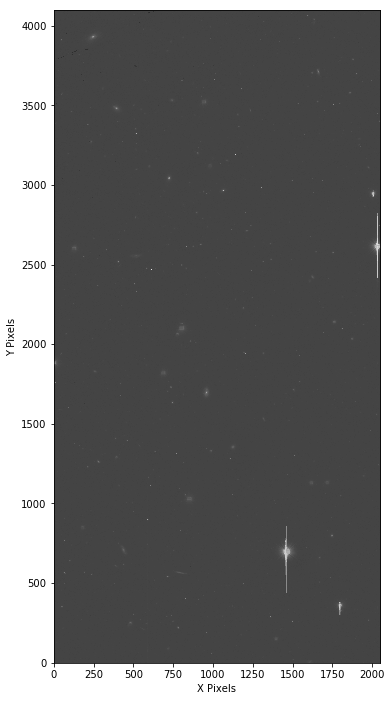

In [33]:
fig = plt.figure(figsize=(12,12))
plt.imshow(im_array[2], origin='lower', cmap=plt.cm.Greys_r)
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

In [34]:
results[['t0_x', 't0_y']]
#results[29]

array([(596.0, 1849.0), (598.0, 1849.0), (1879.0, 2107.0), ...,
       (1370.0, 2797.0), (1407.0, 2798.0), (647.0, 1875.0)], 
      dtype=[('t0_x', '<f8'), ('t0_y', '<f8')])

In [23]:
ai = analyzeImage()

In [68]:
stamp_count = 5
arg = dict(eps=0.05, min_samples=1, n_jobs=-1)
#best_targets = ai.clusterResults(results, dbscan_args=arg)#, im_array, image_times)
#best_targets = best_targets[1]
best_targets = range(stamp_count)
#best_targets

In [69]:
print (len(best_targets))
best_targets

5


[0, 1, 2, 3, 4]

In [38]:
list(results[['t0_x', 't0_y']][29])

[1901.0, 2102.0]

In [39]:
np.array(list(results[['v_x', 'v_y']][29]))

array([  87.967,  270.734])

In [31]:
image_times

array([ 0.      ,  0.003054,  0.006087,  0.009132,  0.012176,  0.015208,
        0.018259,  0.021283,  0.024324,  0.02736 ,  0.030406,  0.033434,
        0.036469,  0.039509,  0.042539,  0.045585,  0.048615,  0.05166 ,
        0.054679,  0.057738,  0.06077 ,  0.063814,  0.06686 ,  0.069889,
        0.07292 ,  0.075965,  0.078999,  0.08204 ,  0.085056,  0.088114,
        0.091128,  0.094168,  0.097206,  0.100257,  0.10328 ,  0.106321,
        0.109352,  0.112373,  0.115429,  0.118454,  0.121503,  0.124518,
        0.127565,  0.130589,  0.133609,  0.136663,  0.139679,  0.142729,
        0.145751,  0.148771,  0.151825,  0.154844,  0.157897,  0.160916,
        0.16396 ])

In [70]:
for imNum in range(100):
    current = imNum#best_targets[imNum]
    
    plt.imshow(ai.createPostageStamp(im_psi_array,
                                         list(results[['t0_x', 't0_y']][current]),
                                         2*np.array(list(results[['v_x', 'v_y']][current])),
                                         image_times*1, [25., 25.])[0],
                    origin='lower',
              # cmap=plt.cm.Greys_r,
               interpolation='None')
    plt.title(str('#' + str(imNum+1) + ' [x,y] = ' + str(list(results[['t0_x', 't0_y']][current])))
                  + ' v = ' + str(list(results[['v_x', 'v_y']][current])))
 #   plt.savefig("stamps/stamp"+str(imNum+1)+".png")
    plt.show()


ValueError: The boundaries of your postage stamp for one of the images go off the edge

In [22]:
fig = plt.figure(figsize=(25,25))
im_per_line = 5
grid = gridspec.GridSpec(10, 7, wspace=2.0, hspace=2.0)
for imNum in range(stamp_count):
    fig.add_subplot(grid[imNum])#outmath.floor(stamp_count/im_per_line),im_per_line,imNum+1)
    try:
        plt.imshow(ai.createPostageStamp(im_array, 
                                     list(results[['t0_x', 't0_y']][best_targets[imNum]]),
                                     list(results[['v_x', 'v_y']][best_targets[imNum]]),
                                     image_times, [25., 25.])[0],
                origin='lower', cmap=plt.cm.Greys_r, interpolation='None')
        plt.title(str(' [x,y] = ' + str(list(results[['t0_x', 't0_y']][best_targets[imNum]]))))
        plt.savefig("test.png")#stamp"+imNum+".png")
    except:
        print "oh no!"
        continue
#plt.tight_layout(outer_grid)


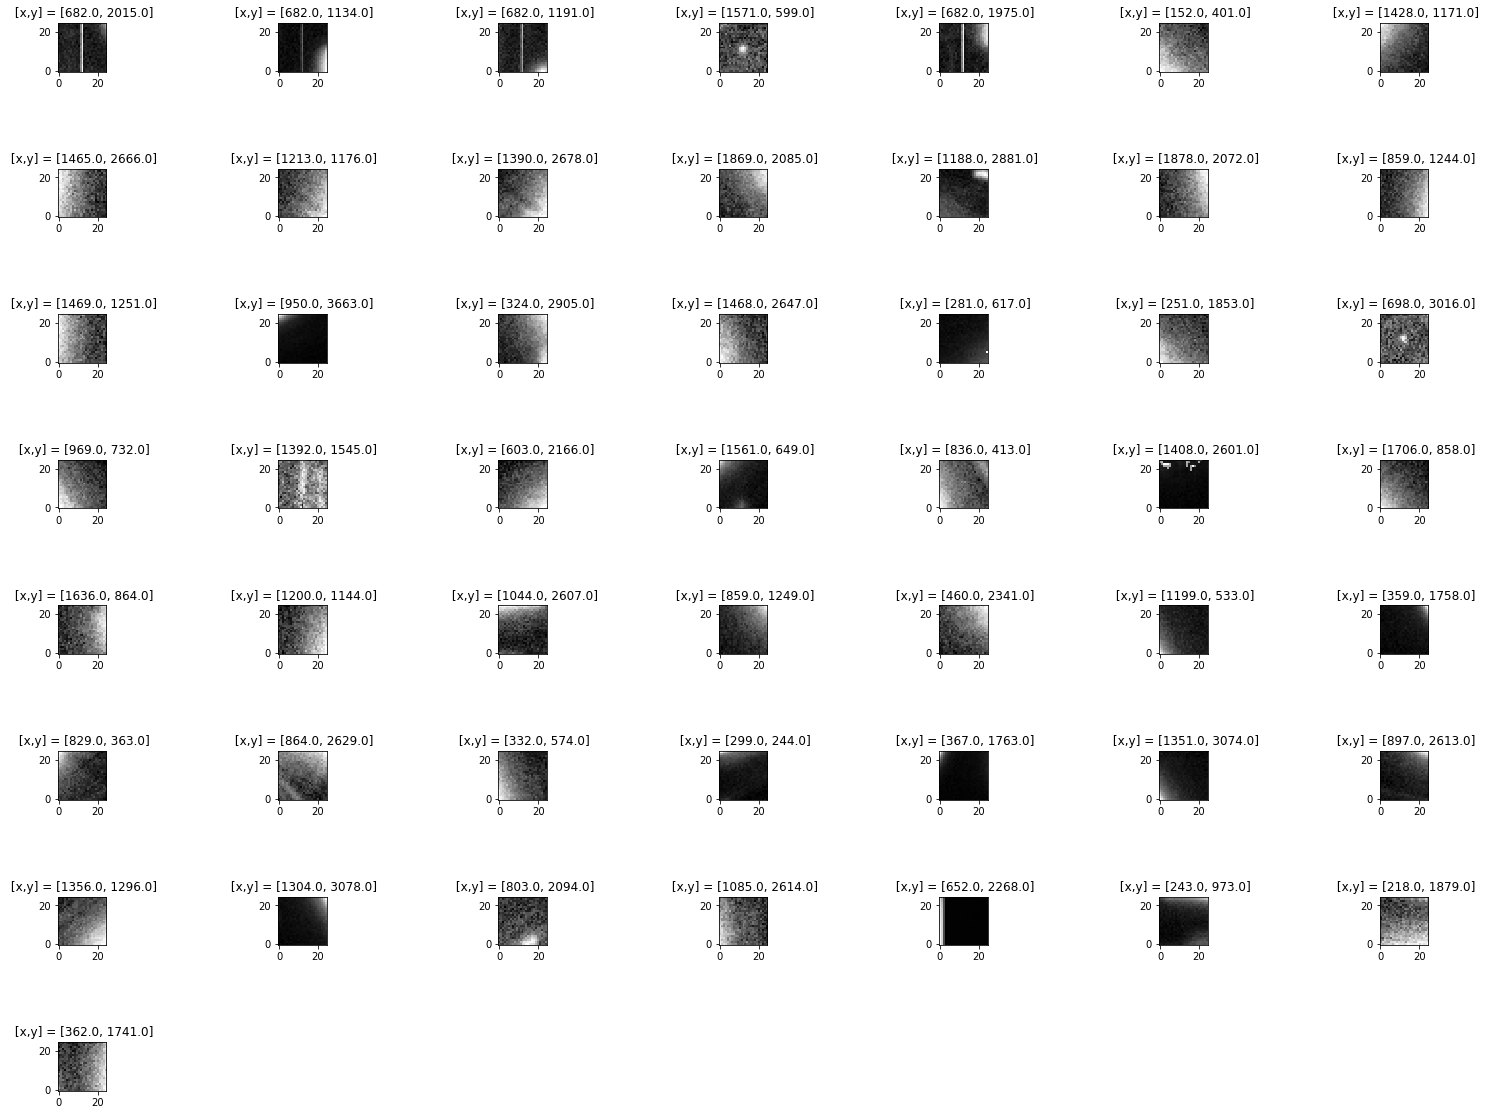

In [17]:
fig = plt.figure(figsize=(25,25))
im_per_line = 5
grid = gridspec.GridSpec(10, 7, wspace=2.0, hspace=2.0)
for imNum in range(stamp_count):
    fig.add_subplot(grid[imNum])#outmath.floor(stamp_count/im_per_line),im_per_line,imNum+1)
    try:
        plt.imshow(ai.createPostageStamp(im_array, 
                                     list(results[['t0_x', 't0_y']][best_targets[imNum]]),
                                     list(results[['v_x', 'v_y']][best_targets[imNum]]),
                                     image_times, [25., 25.])[0],
                origin='lower', cmap=plt.cm.Greys_r, interpolation='None')
        plt.title(str(' [x,y] = ' + str(list(results[['t0_x', 't0_y']][best_targets[imNum]]))))
    except:
        print "oh no!"
        continue
#plt.tight_layout(outer_grid)
plt.show()